In [107]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
from keras.layers import Dense ,Conv2D ,MaxPooling2D ,Dropout ,Flatten,AveragePooling2D 
from keras import optimizers , regularizers 
from keras.models import Model
#import keras.applications.resnet50
from keras.applications.resnet import ResNet50, preprocess_input
#import cv2
import glob
from keras.preprocessing.image import load_img ,img_to_array , array_to_img, ImageDataGenerator
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
# from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import shutil
import keras
from keras.preprocessing import image

In [56]:
# Directory (Wilson's MAC)
#maindirectory = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset"
#tf.__version__

### Work with images

In [53]:
covid_imgs = pd.read_excel("/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
covid_imgs.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [54]:
opacity_images = pd.read_excel("/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx")
opacity_images.head()

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [55]:
pneumonia_images = pd.read_excel("/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
pneumonia_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [57]:
normal_images = pd.read_excel("/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/Normal.metadata.xlsx")
normal_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [71]:
ROOT_DIR = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/augmented/"

In [70]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

Already Exist


In [72]:
# lets visualise the number of images in each category
counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 3616, 'Lung_Opacity': 6012, 'Normal': 10192, 'Viral Pneumonia': 1345}

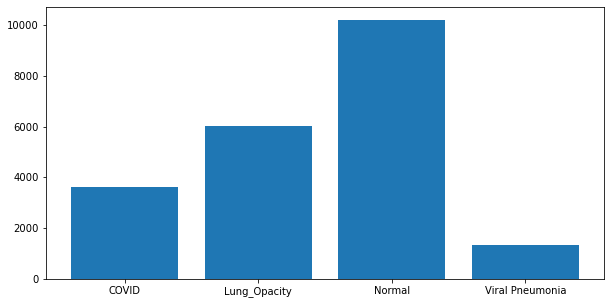

In [73]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [74]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")



In [76]:
# Train Data
for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)


In [77]:
 # Validation Data
for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

In [78]:
# Test Data
for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

In [79]:
train_path  = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/augmented/train_test_split/train"
valid_path  = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/augmented/train_test_split/validation"
test_path   = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/augmented/train_test_split/test"

### working on file

In [80]:
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    shear_range=0.2)
train = train_data_gen.flow_from_directory(directory=train_path, target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [81]:
validattion_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid = validattion_data_gen.flow_from_directory(directory=valid_path, target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [82]:
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test = test_data_gen.flow_from_directory(directory=test_path, target_size=(224,224), shuffle=False)

Found 800 images belonging to 2 classes.


In [83]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

### visualise the data

In [84]:
t_img, label = train.next()

In [85]:
# function when called will plot the images

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  for im,l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


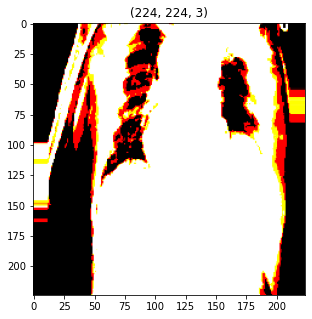

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


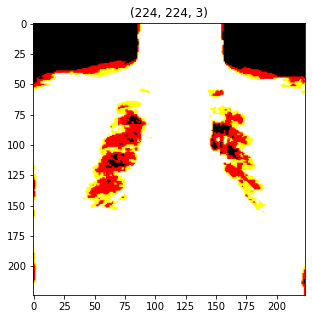

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


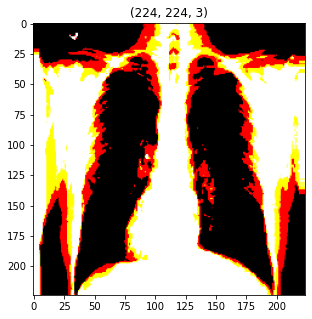

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


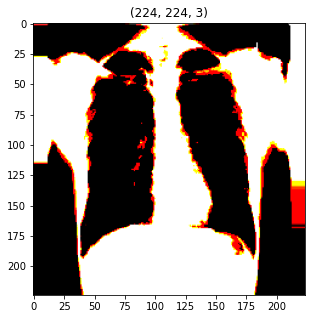

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


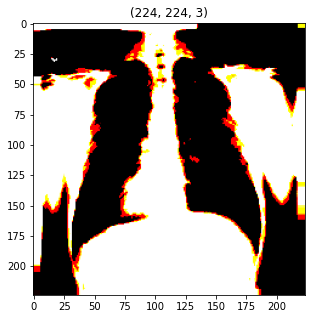

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


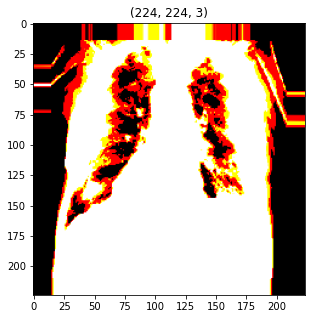

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


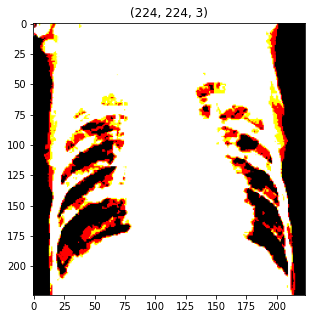

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


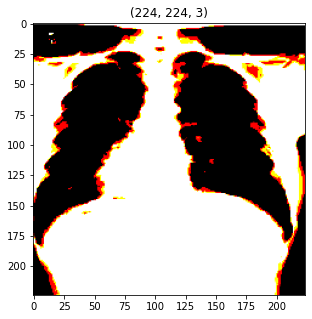

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


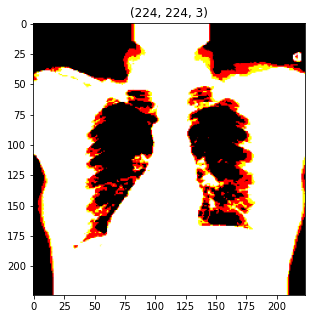

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


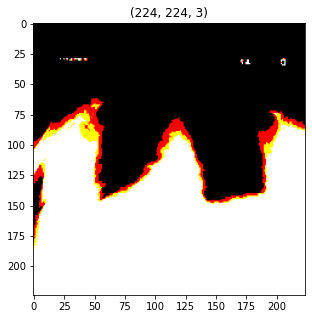

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


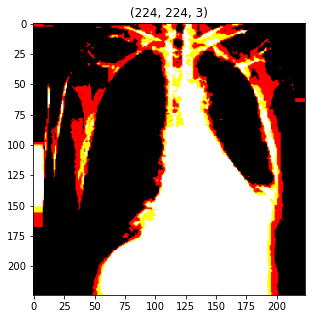

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


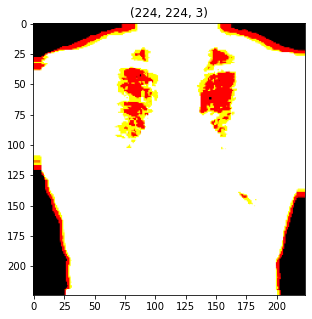

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


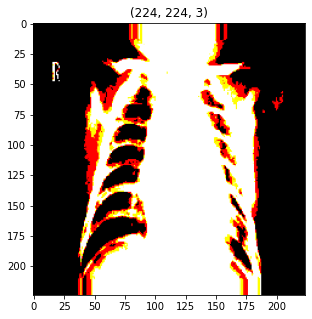

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


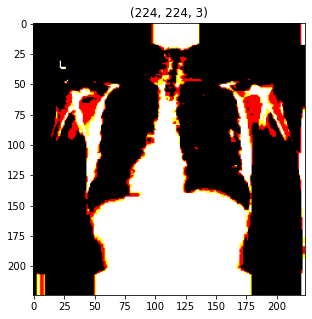

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


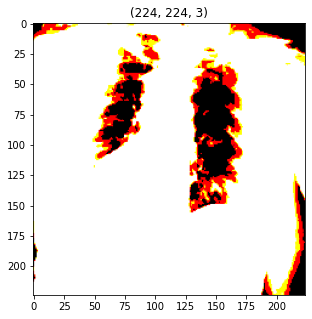

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


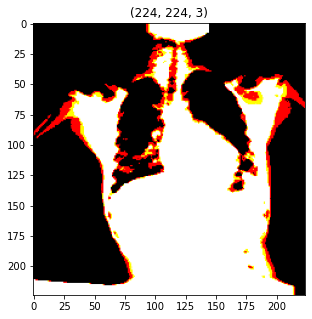

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


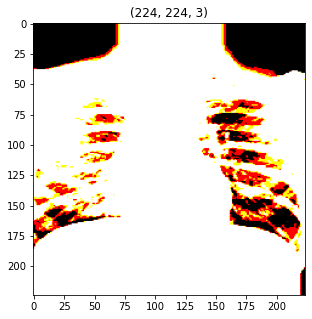

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


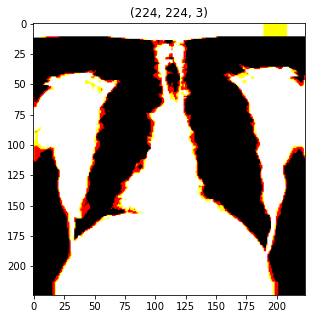

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


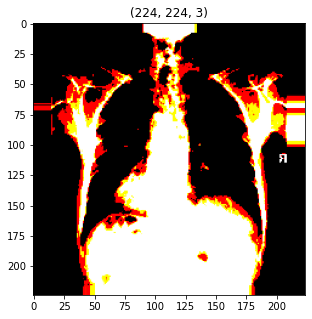

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


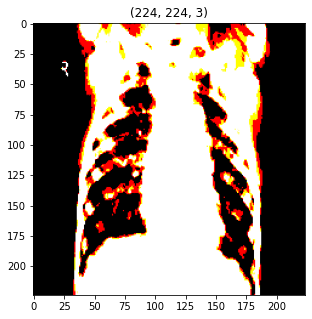

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


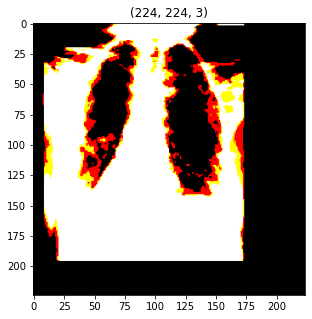

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


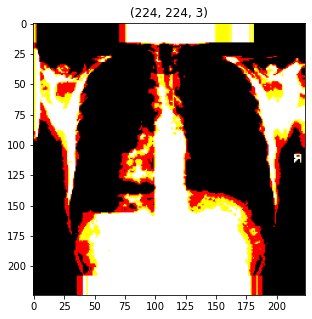

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


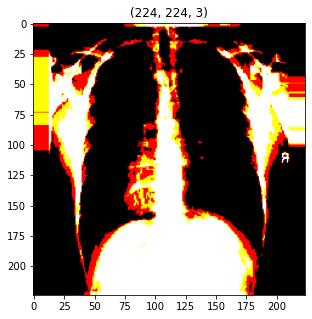

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


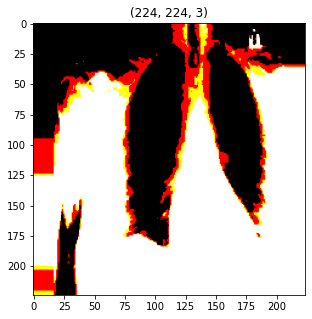

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


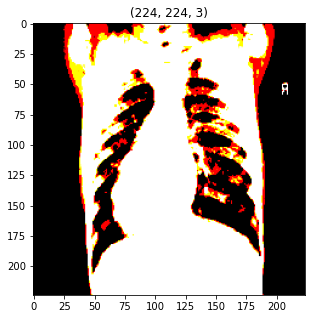

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


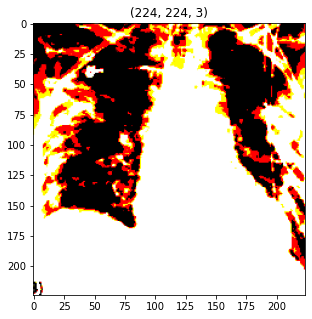

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


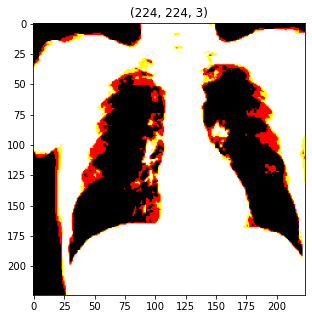

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


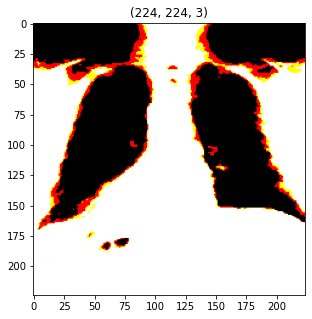

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


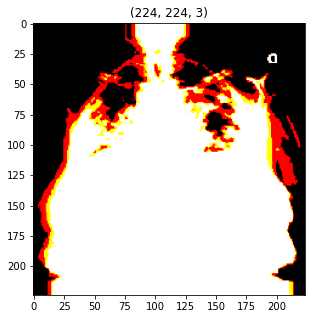

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


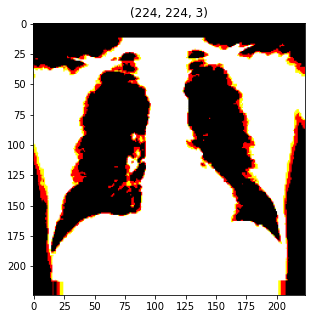

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


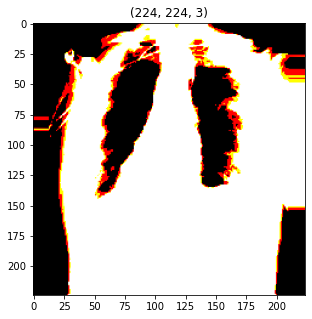

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


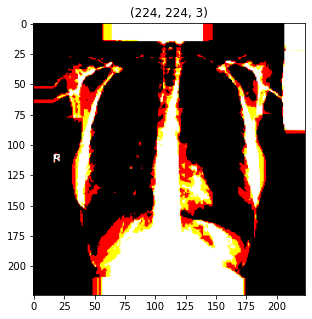

In [86]:
# function call to plot the images

plotImages(t_img, label)

### Resnet50 as the pretrained base

In [87]:
res  = ResNet50( input_shape=(224,224,3), include_top=False)

In [88]:
# We won't train all parameters again
for layer in res.layers:
    layer.trainable = False

In [89]:
x = Flatten()(res.output)
out = Dense(units=2, activation='sigmoid', name='predictions')(x)

# Creating our model
model = Model(inputs=res.input, outputs=out)

In [90]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [94]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
ACCURACY_THRESHOLD = 0.95
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True

es  = myCallback()

In [96]:
hist = model.fit(train, steps_per_epoch=10, epochs=30, validation_data=valid, validation_steps=16, callbacks=[es])

Epoch 1/30
10/10 [==============================] - 90s 9s/step - loss: 16.6045 - accuracy: 0.7312 - val_loss: 2.5084 - val_accuracy: 0.8594
Epoch 2/30
10/10 [==============================] - 106s 10s/step - loss: 5.1468 - accuracy: 0.7906 - val_loss: 2.5732 - val_accuracy: 0.8984
Epoch 3/30
10/10 [==============================] - 80s 8s/step - loss: 2.1343 - accuracy: 0.9094 - val_loss: 5.3366 - val_accuracy: 0.7891
Epoch 4/30
10/10 [==============================] - 79s 8s/step - loss: 7.4458 - accuracy: 0.8156 - val_loss: 3.8174 - val_accuracy: 0.8398
Epoch 5/30
10/10 [==============================] - 82s 9s/step - loss: 6.4389 - accuracy: 0.8094 - val_loss: 1.9303 - val_accuracy: 0.8887
Epoch 6/30
10/10 [==============================] - 80s 9s/step - loss: 3.2615 - accuracy: 0.8625 - val_loss: 2.9384 - val_accuracy: 0.8672
Epoch 7/30
10/10 [==============================] - 84s 9s/step - loss: 6.1795 - accuracy: 0.8031 - val_loss: 1.2548 - val_accuracy: 0.9297
Epoch 8/30
10/10 

In [97]:
model.save("covid-resnet50")

INFO:tensorflow:Assets written to: covid-resnet50/assets


/Users/yzu1032672/opt/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [98]:
# checking out the accuracy of our model 
acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc * 100} %")

/Users/yzu1032672/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy of your model is = 93.00000071525574 %


In [109]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

### Evaluation

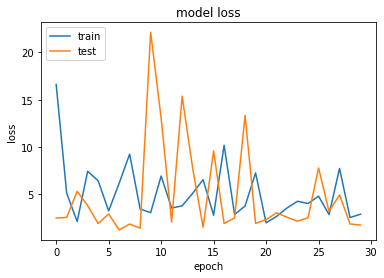

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

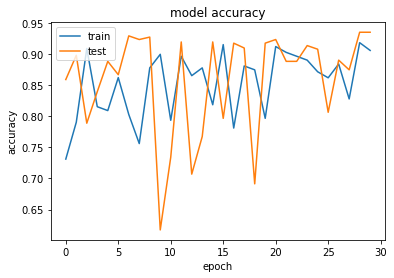

In [100]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(test.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['normal', 'covid']
print(classification_report(test.classes, y_pred, target_names=target_names))

/Users/yzu1032672/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[461  39]
 [ 17 283]]
Classification Report
              precision    recall  f1-score   support

      normal       0.96      0.92      0.94       500
       covid       0.88      0.94      0.91       300

    accuracy                           0.93       800
   macro avg       0.92      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



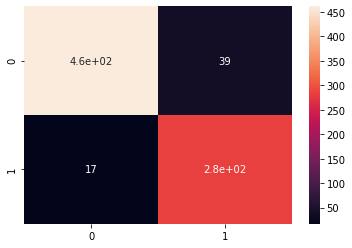

In [102]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot = True)

### Detecting Covid Status

The given X-Ray image is of type = Covid

The chances of image being Covid is : 100.0 percent

The chances of image being Normal is : 5.370528029643411e-15 percent


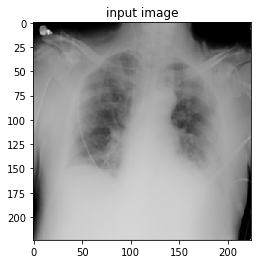

In [111]:
# path for that new image.
path = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset/COVID/COVID-1.png"
# you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()